In [152]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [153]:
# Loading and reading data
file_path=r"D:\payMe\kokoAung\projects\personalProject\simpleLinearRegression\data\regression-one.csv"
data=pd.read_csv(file_path)
df=pd.DataFrame(data)

In [154]:
# Set display option
pd.set_option("display.max_columns", None)

#### Dataset Overview and Inspectation

In [155]:
# Reading the first 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [156]:
# Getting the dataframe shape
print(f"Dataframe shape(rows, columns): {df.shape}")

Dataframe shape(rows, columns): (2938, 22)


In [157]:
# Getting the dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [158]:
# Standardization the dataframe column names
df.columns=df.columns.str.lower().str.replace(" ", "_")

In [159]:
# Getting column names
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [160]:
# Changing data types
df["year"]=df["year"].astype("str")

In [161]:
def identify_dtypes(df):
    """Identify and group columns by their data types."""
    cat_cols   = df.select_dtypes(include=["object", "category"]).columns
    num_cols   = df.select_dtypes(include=["int64", "float64"]).columns
    
    print(f"Categorical columns: {len(list(cat_cols))}\n", list(cat_cols))
    print("="*50)
    print(f"Integer columns:{len(list(num_cols))}\n", list(num_cols))
    print("="*150)

identify_dtypes(df)

Categorical columns: 3
 ['country', 'year', 'status']
Integer columns:19
 ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [162]:
# Missing Columns
null_cols = df.columns[df.isna().any()]
print(f"Number of columns having any missing values: {len(null_cols)}\n")
print(f"Contained Null Values: \n{null_cols}\n")

Number of columns having any missing values: 14

Contained Null Values: 
Index(['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi',
       'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population',
       'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')



In [163]:
# Missing Values Analysis
missing_count = df.isna().sum()
missing_pct = df.isna().mean().mul(100).round(4)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_pct})
print("Missing Values Summary: ")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by= 'Missing Count', ascending=False))

Missing Values Summary: 
                                 Missing Count  Missing Percentage
population                                 652             22.1920
hepatitis_b                                553             18.8223
gdp                                        448             15.2485
total_expenditure                          226              7.6923
alcohol                                    194              6.6031
income_composition_of_resources            167              5.6841
schooling                                  163              5.5480
bmi                                         34              1.1572
thinness_1-19_years                         34              1.1572
thinness_5-9_years                          34              1.1572
polio                                       19              0.6467
diphtheria                                  19              0.6467
life_expectancy                             10              0.3404
adult_mortality                      

In [164]:
# Checking duplicates
print(f"Number of duplicated records: {df.duplicated().sum()}")

Number of duplicated records: 0


#### Data Cleaning

In [165]:
# Removing null values record
df.dropna(axis=0, inplace=True)

In [166]:
# Checking is there any missing values
df.isna().any().any()

False

#### Exploratory Data Analysis

In [169]:
df.select_dtypes(include="number").describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
life_expectancy,1649.00,69.30,8.80,44.00,64.40,71.70,75.00,89.00
adult_mortality,1649.00,168.22,125.31,1.00,77.00,148.00,227.00,723.00
infant_deaths,1649.00,32.55,120.85,0.00,1.00,3.00,22.00,1600.00
alcohol,1649.00,4.53,4.03,0.01,0.81,3.79,7.34,17.87
percentage_expenditure,1649.00,698.97,1759.23,0.00,37.44,145.10,509.39,18961.35
hepatitis_b,1649.00,79.22,25.60,2.00,74.00,89.00,96.00,99.00
measles,1649.00,2224.49,10085.80,0.00,0.00,15.00,373.00,131441.00
bmi,1649.00,38.13,19.75,2.00,19.50,43.70,55.80,77.10
under-five_deaths,1649.00,44.22,162.90,0.00,1.00,4.00,29.00,2100.00
polio,1649.00,83.56,22.45,3.00,81.00,93.00,97.00,99.00


In [170]:
# Checking the correlation between numerical variables
df.select_dtypes(include="number").corr(method="pearson")

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
adult_mortality,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant_deaths,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
alcohol,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage_expenditure,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
hepatitis_b,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
measles,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
bmi,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five_deaths,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013
polio,0.327294,-0.199853,-0.156929,0.240315,0.128626,0.463331,-0.057850,0.186268,-0.171164,1.000000,0.119768,0.609245,-0.107885,0.156809,-0.045387,-0.164070,-0.174489,0.314682,0.350147


In [138]:
# Checking the correlation between "life-expectancy" and others numerical variables
df.select_dtypes(include="number").corr(method="pearson")["life_expectancy"].sort_values(ascending=False)

life_expectancy                    1.000000
schooling                          0.727630
income_composition_of_resources    0.721083
bmi                                0.542042
gdp                                0.441322
percentage_expenditure             0.409631
alcohol                            0.402718
diphtheria                         0.341331
polio                              0.327294
hepatitis_b                        0.199935
total_expenditure                  0.174718
population                        -0.022305
measles                           -0.068881
infant_deaths                     -0.169074
under-five_deaths                 -0.192265
thinness_5-9_years                -0.457508
thinness_1-19_years               -0.457838
hiv/aids                          -0.592236
adult_mortality                   -0.702523
Name: life_expectancy, dtype: float64

#### Simple Linear Regression

In [131]:
# Setting dependent and independent variable
X=df[["schooling"]]
y=df["life_expectancy"]

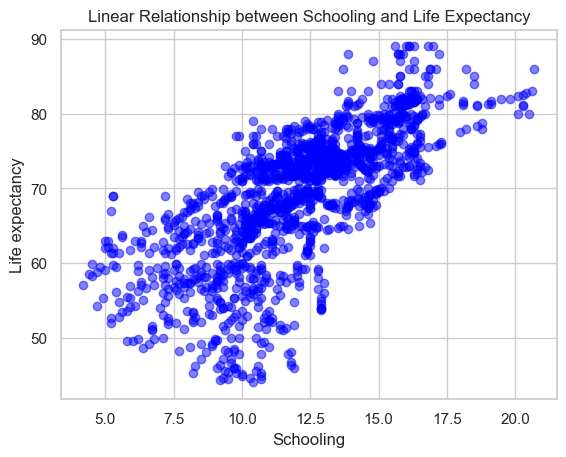

In [139]:
# Checking for Linearity
plt.scatter(X, y, marker="o", color= "blue", alpha=0.5)
plt.title("Linear Relationship between Schooling and Life Expectancy")
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.show()

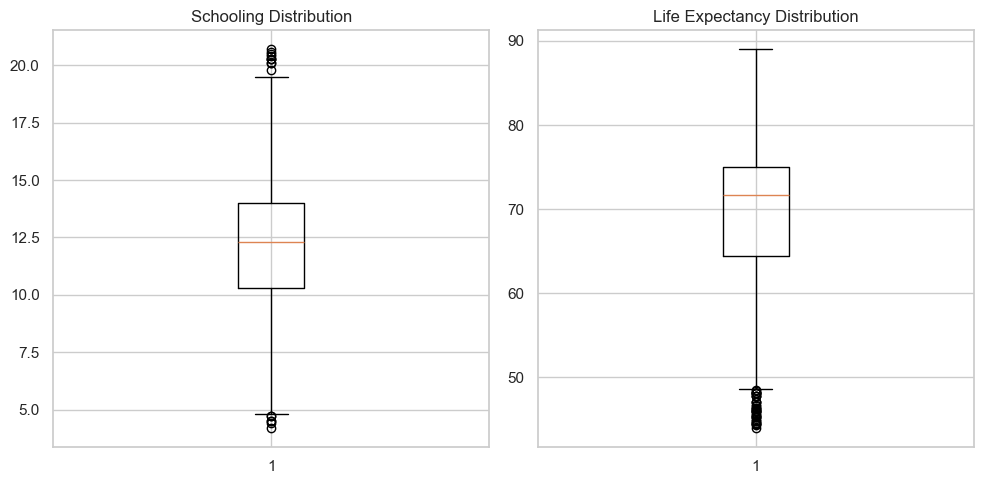

In [148]:
# Checking for outliers
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].boxplot(X)
ax[0].set_title("Schooling Distribution")
ax[1].boxplot(y)
ax[1].set_title("Life Expectancy Distribution")
plt.tight_layout()
plt.show()